In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [2]:
data= pd.read_csv(r"C:\Users\Yash Bhosale\Downloads\bank-full (1).csv",sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


D:\yb python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

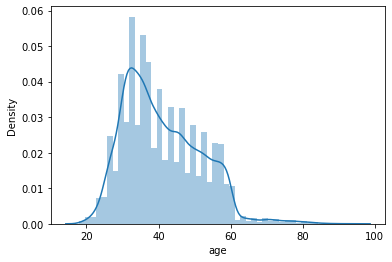

In [50]:
sns.distplot(data['age'])

array([[<AxesSubplot:title={'center':'balance'}>]], dtype=object)

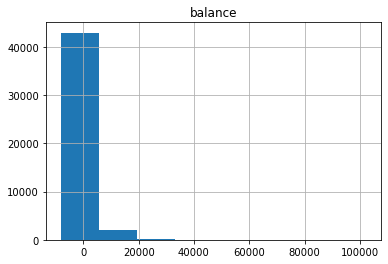

In [51]:
data.hist('balance', bins = 8)

D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

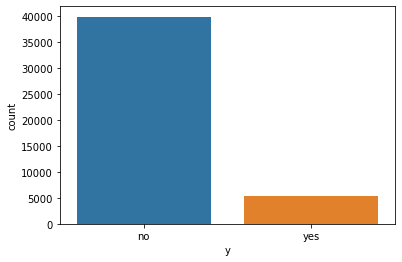

In [52]:
sns.countplot(data['y'])

D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

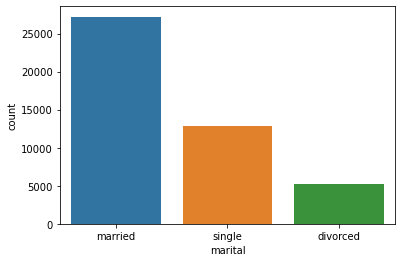

In [53]:
sns.countplot(data['marital'])

D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

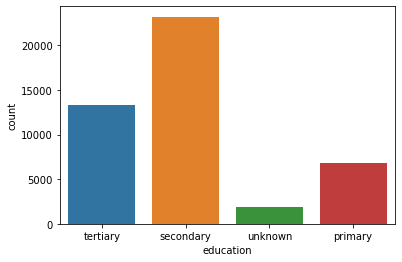

In [54]:
sns.countplot(data['education'])

D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='contact', ylabel='count'>

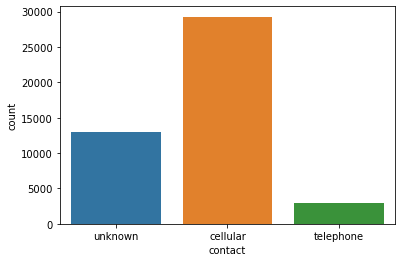

In [58]:
sns.countplot(data['contact'])

D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

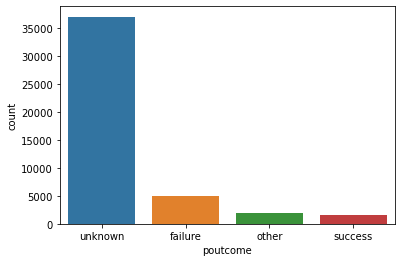

In [59]:
sns.countplot(data['poutcome'])

In [4]:
# Dividing our data into input and output variables 
X = data.iloc[:,0:16]
Y = data.iloc[:,16]
Y = Y.map(dict(yes=1, no=0))

In [5]:
# as we have column with object type data, we need to create separate dummy columns in order to go ahead with logistic regression
# we do not have null as entries in any rows so no need to delete any rows
X=pd.get_dummies(X)
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [6]:
data_new = X.join(Y)
data_new

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,1,0,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin.           45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

In [8]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

D:\yb python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [10]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [11]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [12]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39138   784]
 [ 4103  1186]]


In [13]:
classifier.score(X,Y)

0.8919068368317444

In [14]:
#Classification report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

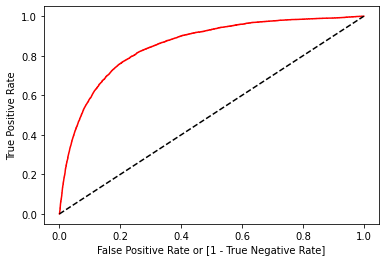

In [15]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [16]:
auc

0.6023003459506484

After seeing the confusion matrix TP = 39191 and TN = 1184, Which clearly indicates that our model will be biased towards TP more
In order to create a more balanced model lets create a model that takes equal no. of rows with y as yes and same number of y as noes

In [17]:
datay = data_new[data_new['y'] == 1]
datan = data_new[data_new['y'] == 0]

In [18]:
datay

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
83,59,2343,5,1042,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
86,56,45,5,1467,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
87,41,1270,5,1389,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
129,55,2476,5,579,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
168,54,184,5,673,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,2850,17,300,1,40,8,0,0,0,...,0,0,1,0,0,1,0,0,0,1
45205,25,505,17,386,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [19]:
datan = datan.sample(n=5290)
datan

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
4447,32,0,20,142,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
35963,43,490,8,216,2,368,2,0,1,0,...,0,1,0,0,0,1,0,0,0,0
7807,31,-219,30,66,2,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
33302,34,965,20,372,2,332,2,0,1,0,...,0,0,0,0,0,0,1,0,0,0
30030,34,382,4,494,2,198,7,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34529,33,30,5,125,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
27222,34,1240,21,102,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
34795,46,16,6,304,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
26333,52,6909,20,223,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
data = pd.concat([datay,datan])
data = data.sample(frac=1)
data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
31394,46,11385,24,269,3,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
39407,39,116,22,554,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
44011,26,222,28,247,1,63,2,0,0,0,...,0,0,0,0,0,0,0,1,0,1
15947,33,30,22,1077,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9420,50,-294,6,79,3,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4662,36,162,20,216,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
28941,55,-308,2,781,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
15736,58,9004,21,891,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
474,34,869,6,1677,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1


In [21]:
# Dividing our data into input and output variables 
X = data.iloc[:,0:51]
Y = data.iloc[:,51]

In [22]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

D:\yb python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [24]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [25]:
y_pred_df

,actual,predicted_prob
31394,1,1
39407,1,1
44011,1,1
15947,1,1
9420,0,0
...,...,...
4662,0,0
28941,1,1
15736,1,1
474,1,1


In [26]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[4233 1057]
 [1052 4237]]


In [27]:
classifier.score(X,Y)

0.800642782871727

In [28]:
#Classification report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5290
           1       0.80      0.80      0.80      5289

    accuracy                           0.80     10579
   macro avg       0.80      0.80      0.80     10579
weighted avg       0.80      0.80      0.80     10579



Text(0, 0.5, 'True Positive Rate')

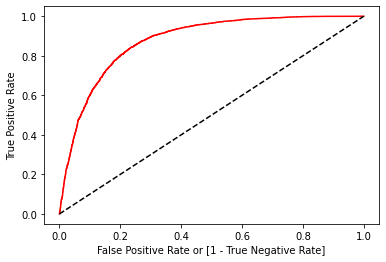

In [29]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [40]:
auc

0.8055255133594835

Classification report indicates that the precision as well as recall is improved in the model which is also supported by increased area under the curve(AUC)
Hence we have improved our Logistic Model to give better results
Using this model to predict y for original dataset

In [31]:
data = pd.read_csv(r"C:\Users\Yash Bhosale\Downloads\bank-full (1).csv",delimiter=';')
X = data.iloc[:,0:16]
Y = data.iloc[:,16]
Y = Y.map(dict(yes=1, no=0))
X=pd.get_dummies(X)

In [32]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [33]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [34]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,1


In [35]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[32335  7587]
 [ 1052  4237]]


In [36]:
classifier.score(X,Y)

0.8089181836278782

In [37]:
#Classification report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     39922
           1       0.36      0.80      0.50      5289

    accuracy                           0.81     45211
   macro avg       0.66      0.81      0.69     45211
weighted avg       0.90      0.81      0.84     45211



Text(0, 0.5, 'True Positive Rate')

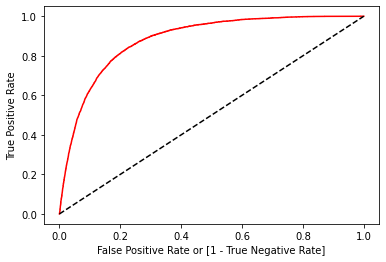

In [38]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [39]:
auc

0.8055255133594835